<a href="https://colab.research.google.com/github/NeZorinEgor/Computer-vision/blob/main/checkingForSimilarity/checkingForSimilarity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

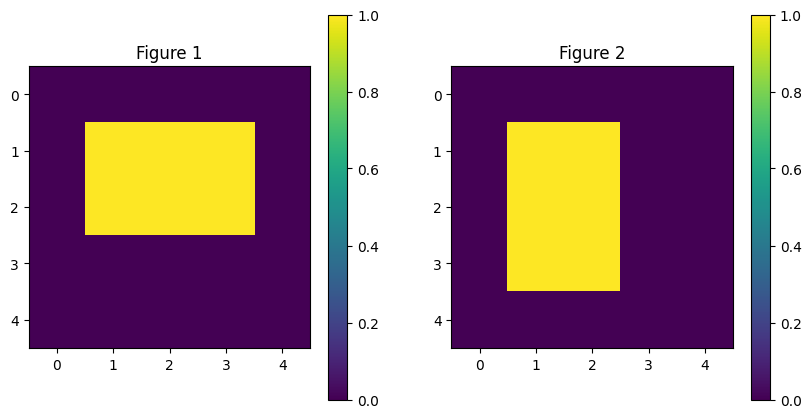

figure and figure2 are equivalent


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Определение направлений
directions = {
    0: (0, 1),    # Движение вправо
    1: (-1, 1),   # Движение в правый верхний угол
    2: (-1, 0),   # Движение вверх
    3: (-1, -1),  # Движение в левый верхний угол
    4: (0, -1),   # Движение влево
    5: (1, -1),   # Движение в левый нижний угол
    6: (1, 0),    # Движение вниз
    7: (1, 1)     # Движение в правый нижний угол
}

# data = np.load('similar.npy')
figure = np.zeros((5, 5))
figure[1:3, 1:-1] = 1
figure2 = figure.T

def find_perimeter_transitions(figure2):
    perimeter_transitions = []

    # Индексы всех единиц на периметре
    perimeter_points = np.argwhere(figure2 == 1)

    # Если нет точек на периметре, вернем пустой список
    if len(perimeter_points) == 0:
        return perimeter_transitions

    rows, cols = figure2.shape

    for point in perimeter_points:
        y, x = point
        transitions = []

        for i in range(8):
            dy, dx = directions[i]
            ny, nx = y + dy, x + dx

            if 0 <= ny < rows and 0 <= nx < cols:
                if figure2[y, x] == 1 and figure2[ny, nx] == 0:
                    transitions.append(i)

        if transitions:
            perimeter_transitions.append((point, transitions))

    return perimeter_transitions

# Найдем цепочку переходов
perimeter_transitions = find_perimeter_transitions(figure2)

output = np.zeros_like(figure2)

for point, transitions in perimeter_transitions:
    y, x = point
    output[y, x] = 1

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title("Figure 1")
plt.imshow(output1, cmap='viridis')
plt.colorbar()

plt.subplot(122)
plt.title("Figure 2")
plt.imshow(output2, cmap='viridis')
plt.colorbar()

plt.show()

def are_figures_equivalent(figure1, figure2):
    # Проверяем, что размерности фигур совпадают
    if figure1.shape != figure2.shape:
        return False

    # Перебираем все возможные повороты figure2 и сравниваем с figure1
    for _ in range(4):
        if np.array_equal(figure1, figure2):
            return True
        figure2 = np.rot90(figure2)

    return False

if are_figures_equivalent(figure, figure2):
    print("figure and figure2 are equivalent")
else:
    print("figure and figure2 are not equivalent")